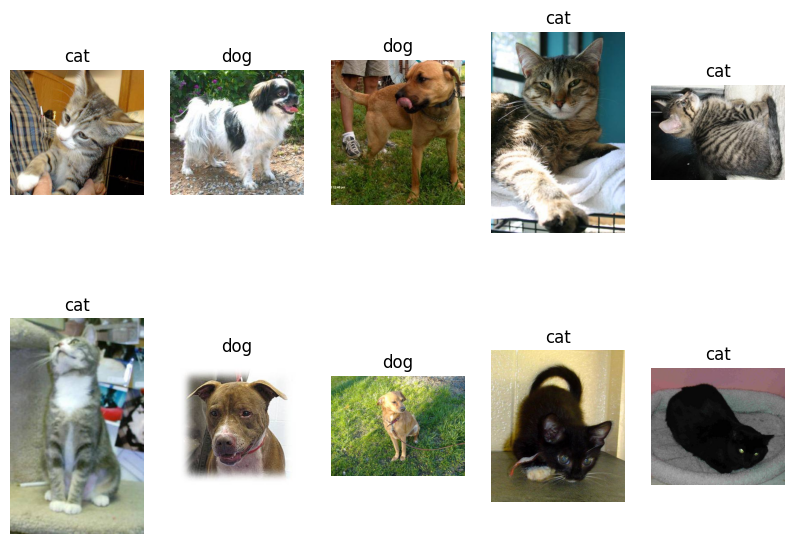

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import re
from pathlib import Path

# VS vill inte läsa mina folders utan en relevant path
current_path= Path().absolute()         # current path
test_path= current_path/"original_data"/"test"/"test"   # path to the test data
train_path= current_path/"original_data"/"train"/"train"    # path to train data

train_list = list(train_path.iterdir())
test_list = list(test_path.iterdir())

pictures = np.random.choice(train_list, 10, replace=False)

pattern = r"\b\w{3}\b"
labels = [re.findall(pattern, path.name)[0] for path in pictures]

fig, axes = plt.subplots(2, 5, figsize=(10, 7))
for i, ax in enumerate(axes.flatten()):
    image_path = pictures[i] 
    image = plt.imread(image_path) 
    ax.imshow(image)
    ax.set_title(labels[i])
    ax.axis("off")

plt.show()


d) Nu ska du göra train|val|test split med följande splits:

experiment_small
* train - 1600 (800 dogs, 800 cats)
* val - 400 (200 dogs, 200 cats)
* test - 500 (250 dogs, 250 cats)

experiment_tiny (BONUS)
* train - 160 (80 dogs, 80 cats)
* val - 40 (20 dogs, 20 cats)
* test - 50 (25 dogs, 25 cats

In [50]:
import shutil
from pathlib import Path
import random

current_path = Path().absolute()

original_train = current_path / "original_data/train/train"
small_data = current_path / "experiment_small_data"
tiny_data = current_path / "experiment_tiny_data"

# Definerar hur många av vad vi skulle ha
splits_small = {
    "train": {"dogs": 800, "cats": 800},
    "val": {"dogs": 200, "cats": 200},
    "test": {"dogs": 250, "cats": 250}
}

splits_tiny = {
    "train": {"dogs": 80, "cats": 80},
    "val": {"dogs": 20, "cats": 20},
    "test": {"dogs": 25, "cats": 25}
}

# Räknar filerna i varje folder
def count_files(directory):
    return sum(1 for item in directory.iterdir() if item.is_file())

# OBS GPT LÖSNING: Check if target directory already contains maximum number of files 
def sample_and_move_files(source_path, target_path, splits): 
    for subset, numbers in splits.items():
        target_folder = target_path / subset
        if count_files(target_folder) >= sum(numbers.values()):
            print(f"Skipping {subset} as it already contains the maximum number of files.")
            continue

        # Blandar bilderna ifrån varje grupp
        dogs = list(source_path.glob("*dog*"))
        cats = list(source_path.glob("*cat*"))
        random.shuffle(dogs)
        random.shuffle(cats)

        # Function to move files from source to target directory
        def move_files(files, category, animal):
            target_folder = target_path / category
            for file in files:
                # Move each file to the respective target folder
                shutil.move(str(file), str(target_folder))
            print(f"Moved {len(files)} {animal} to {category}")

        # Execute moving files based on the split configuration
        # Only move files if the target directory is not at its maximum capacity
        for subset, numbers in splits.items():
            target_folder = target_path / subset
            if count_files(target_folder) >= sum(numbers.values()):
                print(f"Skipping {subset} as it already contains the maximum number of files.")
                continue

            # Move dogs
            num_dogs = min(numbers["dogs"], len(dogs))  # Ensure not to exceed available files
            move_files(dogs[:num_dogs], subset, "dogs")
            dogs = dogs[num_dogs:]  # Remove moved dogs from the list

            # Move cats
            num_cats = min(numbers["cats"], len(cats))  # Ensure not to exceed available files
            move_files(cats[:num_cats], subset, "cats")
            cats = cats[num_cats:]  # Remove moved cats from the list

# Call the function to perform the splits for small and tiny data
sample_and_move_files(original_train, small_data, splits_small)
sample_and_move_files(original_train, tiny_data, splits_tiny)


Skipping train as it already contains the maximum number of files.
Skipping val as it already contains the maximum number of files.
Skipping test as it already contains the maximum number of files.
Skipping train as it already contains the maximum number of files.
Skipping val as it already contains the maximum number of files.
Skipping test as it already contains the maximum number of files.


---

 e) Läs in dataseten från experiment_small, experiment_tiny (BONUS) och plocka ut labelsvektorer, som
ska vara one-hot encoded med 0 och 1.
* plotta några bilder med deras respektive labels och kontrollera att det är korrekt.
* skapa lämplig plot för att kontrollera att dataseten är balanserade
* skapa lämplig plot för att kontrollera att dataseten är slumpade

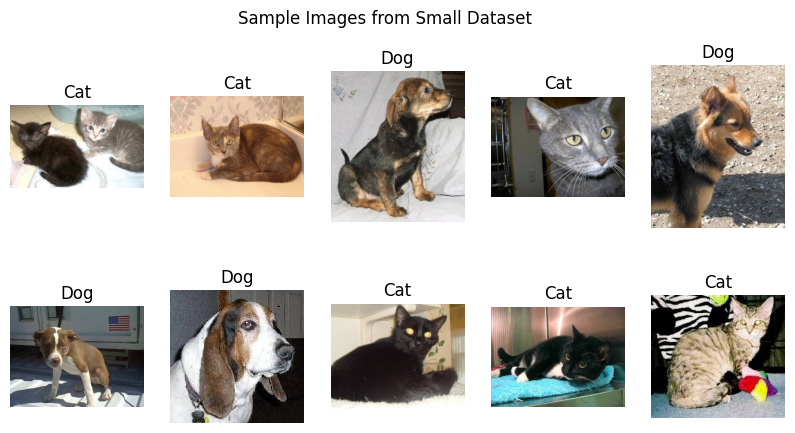

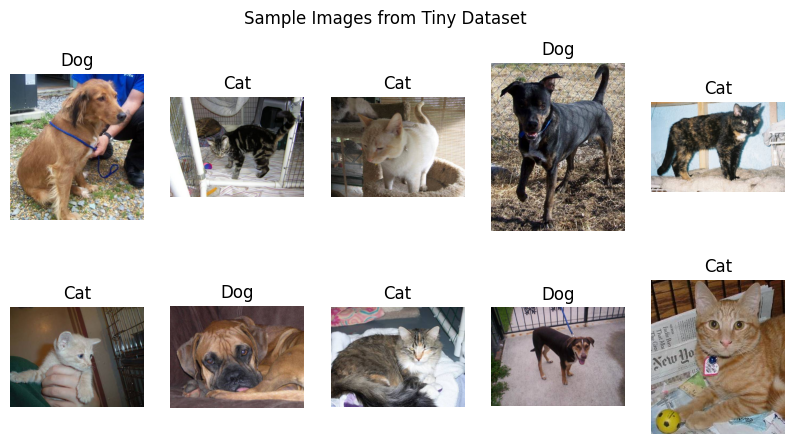

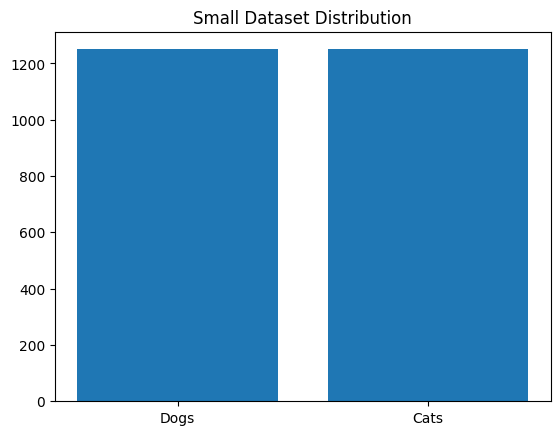

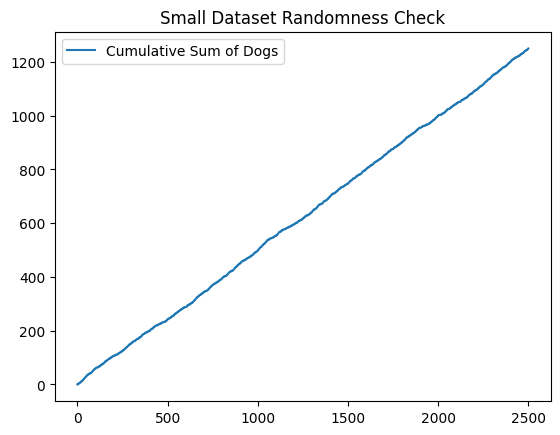

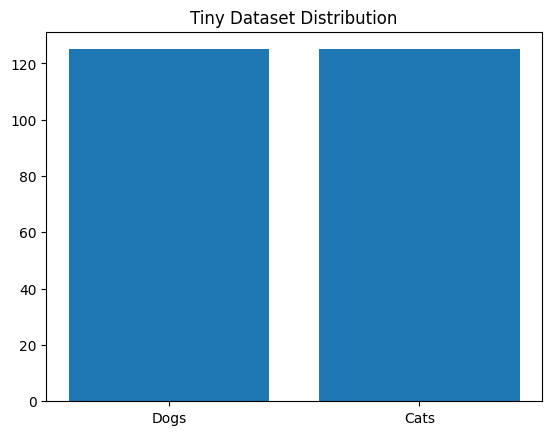

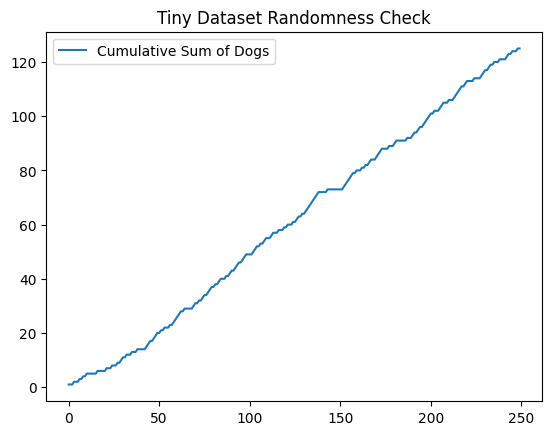

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.preprocessing import LabelBinarizer
from pathlib import Path
import random

base_path = Path("C:/Users/lager/Documents/Github/AI-Bjorn-Lagerblad-OPA23/labs/labb2")
small_data_path = base_path / "experiment_small_data"
tiny_data_path = base_path / "experiment_tiny_data"

def load_data_and_labels(data_path):
    images = []
    labels = []
    for category in ["train", "val", "test"]:
        cat_dir = data_path / category
        files = list(cat_dir.glob("*"))
        random.shuffle(files)  # Shuffle the list to randomize file order
        for image_path in files:
            images.append(imread(str(image_path)))
            file_name = image_path.name.lower()
            if "dog" in file_name:
                labels.append("dog")
            elif "cat" in file_name:
                labels.append("cat")
    lb = LabelBinarizer()
    labels = lb.fit_transform(labels)
    labels = np.array(labels)
    return images, labels, files

images_small, labels_small, files_small = load_data_and_labels(small_data_path)
images_tiny, labels_tiny, files_tiny = load_data_and_labels(tiny_data_path)

def plot_images_with_labels(images, labels, title):
    plt.figure(figsize=(10, 5))
    for i in range(min(10, len(images))):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title("Dog" if labels[i, 0] == 1 else "Cat")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

plot_images_with_labels(images_small, labels_small, "Sample Images from Small Dataset")
plot_images_with_labels(images_tiny, labels_tiny, "Sample Images from Tiny Dataset")

def plot_label_distribution(labels, title):
    dog_count = np.sum(labels[:, 0] == 1)
    cat_count = len(labels) - dog_count
    plt.bar(["Dogs", "Cats"], [dog_count, cat_count])
    plt.title(title + " Distribution")
    plt.show()
    plt.plot(np.cumsum(labels[:, 0]), label="Cumulative Sum of Dogs")
    plt.title(title + " Randomness Check")
    plt.legend()
    plt.show()

plot_label_distribution(labels_small, "Small Dataset")
plot_label_distribution(labels_tiny, "Tiny Dataset")
